In [1]:
import numpy as np
import os
import glob
import ntpath
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random


# Corremos los tests

In [2]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_15_segundos.txt 0.9 > ./resultados/test_15_segundos.txt.out 2> ./resultados/test_15_segundos.txt.time


In [67]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_30_segundos.txt 0.8 > ./resultados/test_30_segundos.txt.out


In [68]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_aleatorio.txt 0.85 > ./resultados/test_aleatorio.txt.out


In [69]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_aleatorio_desordenado.txt 0.76 > ./resultados/test_aleatorio_desordenado.txt.out


In [70]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_completo.txt 0.5 > ./resultados/test_completo.txt.out


In [73]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_trivial.txt 0.5 > ./resultados/test_trivial.txt.out


In [74]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_sin_links.txt 0.5 > ./resultados/test_sin_links.txt.out


In [76]:
def compare(docResults, ourResults):
    docResultsArr = [l.strip() for l in docResults]
    ourResultsArr = [l.strip() for l in ourResults]
    print(len(docResultsArr) == len(ourResultsArr))
    for i in range(len(docResultsArr)):
        print(i)
    

test_doc_path = '../tests_docentes/tests_tp1/'
for filename in glob.glob(os.path.join(test_doc_path, '*.txt.out')):
    with open(filename, encoding="utf-8") as docResults:
        basename = ntpath.basename(filename)
        with open('./resultados/'+basename) as ourResults:
            compare(docResults, ourResults)
        

True
0
1
True
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076

In [83]:
a = np.array([[ 1 , -0.283333 , -0.283333 , -0.283333 , 0 ]  , 
 [ 0 , 1 , 0 , 0 , 0 ]  , 
 [ -0.283333 , 0 , 1 , -0.283333 , 0 ]  , 
 [ -0.283333 , -0.283333 , -0.283333 , 1 , 0 ]  , 
 [ -0.283333 , -0.283333 , -0.283333 , -0.283333 , 1 ] ])
b = np.ones(5)
x = np.linalg.solve(a, b)
x
y = x / np.sum(x)
y

array([ 0.21930165,  0.07784444,  0.20211523,  0.21930165,  0.28143704])

In [13]:
def runProgram(p,input_file,out_path,out_path_time):
    !../cmake-build-debug/pageRank $input_file $p > $out_path 2> $out_path_time


test_doc_path = '../tests_docentes/tests_tp1/'
test_ours_path = './resultados/'
for filename in glob.glob(os.path.join(test_doc_path, '*.txt.out')):
    with open(filename, encoding="utf-8") as docResults:
        p = docResults.readline()
        out_path = test_ours_path + ntpath.basename(filename)
        out_path_time = our_path.replace('.out','.time')
        input_file = filename.replace('.out','')
        print(p + our_path + input_file)
        runProgram(p,input_file,out_path,out_path_time)
        
        
        
        
        

0.3
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_trivial.txt
3.431e-06;1.429e-06;5.18e-07;7.94e-07
0.3
1
0.9
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_15_segundos.txt
5.60706;1.75868;0.0629722;0.000350082
0.9
0.000476137
0.000808404
0.000477048
0.000911909
0.000394625
0.00046918
0.000334599
0.000426665
0.000791063
0.000765351
0.000287186
0.000400119
0.000286101
0.000661215
0.0005851
0.000410099
0.00054877
0.000494718
0.000578984
0.00037386
0.000708613
0.000570361
0.000665331
0.000568985
0.000483076
0.000467066
0.000853051
0.000883001
0.000869032
0.000680767
0.000889921
0.000616762
0.000423453
0.000434038
0.00051733
0.000663121
0.000501422
0.000675856
0.000379918
0.000755712
0.000644529
0.000232499
0.00055797
0.00082238
0.000500095
0.000492302
0.000640897
0.000359437
0.00106719
0.000586976
0.000836789
0.000506529
0.000766966
0.000461032
0.000396464
0.000410016
0.000492007
0.00101022
0.000622775
0.000459625
0.000755833
0.000554614
0.0010107
0.

0.64
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_sin_links.txt
5.7751e-05;4.4183e-05;8.194e-06;4.118e-06
0.64
0.2
0.2
0.2
0.2
0.2
0.5
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_completo.txt
0.000240016;0.00011003;0.000116888;5.79e-06
0.5
0.2
0.2
0.2
0.2
0.2
0.85
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_aleatorio.txt
9.497e-05;5.9572e-05;4.9028e-05;4.032e-06
0.85
0.220193
0.0793122
0.197721
0.220193
0.282581
0.8
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_30_segundos.txt
12.7941;3.87342;0.128551;0.000525738
0.8
0.000276029
0.000352836
0.00033496
0.000352229
0.000634891
0.000389497
0.000315478
0.000507262
0.00047441
0.000354173
0.000449128
0.000540477
0.000324307
0.00071928
0.00051386
0.000435127
0.000213864
0.000320267
0.000331802
0.000419796
0.00043544
0.000374516
0.000501527
0.000229889
0.000261392
0.000504797
0.000230558
0.000365034
0.000465549
0.000363383
0.000391745
0.000198467
0.000390116
0

0.76
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_aleatorio_desordenado.txt
2.4514e-05;1.4616e-05;1.2855e-05;1.1e-06
0.76
4.42908e-17
1.83745e-17
3.96359e-17
4.42908e-17
1


# Generamos matrices  W de tamaño y links variables

In [147]:
inputs_path = './inputs/'

def generateW(numberOfRows, percentageOfLinks):
    filename = inputs_path + str(numberOfRows) + "_" + str(percentageOfLinks) + ".txt"
    f = open(filename,"w+")
    
    f.write(str(numberOfRows) + '\n')
    numberOfLinks = int((numberOfRows**2) * percentageOfLinks)
    f.write(str(numberOfLinks) + '\n')
    
    for link in range(0,numberOfLinks):
        first = random.randint(1,numberOfRows)
        second = random.randint(1,numberOfRows)
        f.write(str(first) + " " + str(second) + "\n")
        
    
    f.close() 
    return filename


for i in range(20,401,20):
    for step in range(10,101,10):
        generateW(i, step/100)
        
        
        
        



# Corremos experimentos para ver cómo afecta a los tiempos variar el tamaño de una matriz para p fijo

In [154]:
results_path = "./results/"
pValue = 0.7

def refreshTimeResults():
    filename = results_path + "time"
    f = open(filename,"w+")
    f.write("Rows;Links;P;Multiplication_time;Adding_time;Gauss_time;Resolve_time \n")
    f.close()

refreshTimeResults()
for filename in glob.glob(os.path.join(inputs_path, '*.txt')):
    out_path = ntpath.basename(filename)
    param = "../experimentacion/inputs/"+out_path
    !../cmake-build-debug/pageRank $param $pValue

2.7484;0.020619;0.00128215;1.7854e-05
0
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.0031

0.00100152;0.00011076;2.0847e-05;2.933e-06
0
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.000643188;8.0059e-05;2.0858e-05;2.645e-06
0
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
2.45715;0.0194633;0.00128162;2.6755e-05
0
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0

0.458137;0.00599767;0.00042513;8.848e-06
0
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556


0.0109953;0.000475976;7.6394e-05;4.488e-06
0
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
1.71156;0.0107513;0.00163861;1.9004e-05
0
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.002

0.00183661;0.000206932;5.1658e-05;9.447e-06
0
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.0366332;0.000910343;9.8584e-05;4.245e-06
0
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
2.39259;0.0165077;0.00144109;1.7011e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.0029411

0.359058;0.00636115;0.000357893;1.1939e-05
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.0

0.133672;0.00202122;0.000267041;6.977e-06
0
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286

0.0122944;0.000527558;0.000262405;1.4039e-05
0
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
1.78837;0.0142935;0.00113756;1.4527e-05
0
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.0

0.0913372;0.000986783;0.000425561;8.688e-06
0
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.005555

0.414191;0.00494354;0.000522134;9.698e-06
0
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.

1.59468;0.0135728;0.000994933;1.4219e-05
0
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143


0.597993;0.00599525;0.000735186;1.197e-05
0
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667

0.148332;0.00147716;0.000623944;1.0233e-05
0
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.0045454

0.777909;0.00864434;0.000863839;1.324e-05
0
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615

4.03848;0.0232924;0.00197325;3.5924e-05
0
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025

5.65685;0.032781;0.00197972;2.3013e-05
0
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025


0.0515826;0.00129074;0.000191097;7.983e-06
0
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.177895;0.00277767;0.000268198;6.94e-06
0
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.00714286
0.007

0.00790892;0.000450658;4.7424e-05;3.63e-06
0
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.0729931;0.000787421;0.000341261;1.3038e-05
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00

0.0315957;0.000648086;0.000105026;5.852e-06
0
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.571232;0.00389787;0.00161869;2.8097e-05
0
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.

3.08097;0.0220265;0.00143746;1.7622e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0

0.278014;0.00373033;0.00054363;1.4241e-05
0
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556

2.14088;0.0169034;0.00113289;2.5885e-05
0
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0

2.40651;0.0193737;0.00114758;2.6939e-05
0
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0.00333333
0

0.00252652;0.000218291;3.0185e-05;3.88e-06
0
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.0348511;0.000716289;8.464e-05;4.602e-06
0
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.0166667
0.961901;0.00715587;0.00174215;2.3311e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.

0.044836;0.00101694;9.8718e-05;4.238e-06
0
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.755797;0.0071961;0.000731026;1.4353e-05
0
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0.00416667
0

1.94607;0.0159131;0.000998412;1.6283e-05
0
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143


2.04872;0.0147953;0.00145278;1.837e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.

1.3012;0.0116213;0.000948764;1.2332e-05
0
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0

0.109778;0.00202343;0.000372921;2.0186e-05
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.0

0.15192;0.00283817;0.000201528;5.762e-06
0
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333
0.00833333


0.35706;0.00504041;0.000350792;9.691e-06
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.006

3.26506;0.0209739;0.00178699;2.1684e-05
0
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0.00263158
0

0.00854572;0.000268875;0.000132542;5.371e-06
0
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
1.04217;0.00962852;0.000861207;1.3203e-05
0
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.003846

0.151895;0.00185026;0.000425695;8.498e-06
0
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556
0.00555556

1.16545;0.01062;0.000861766;1.2159e-05
0
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.00384615
0.

0.275082;0.00417381;0.000375426;9.056e-06
0
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00

1.11226;0.00747361;0.00199931;2.7594e-05
0
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778
0.00277778


0.508916;0.00751787;0.000667418;1.577e-05
0
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.

0.946584;0.00812397;0.000994573;1.3573e-05
0
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.00357143
0.0035714

0.13366;0.00239585;0.000194728;7.316e-06
0
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.0604946;0.00164795;0.000125942;5.986e-06
0
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125

0.583869;0.0062045;0.000786635;1.2985e-05
0
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545
0.00454545

3.333;0.0234015;0.00144161;3.0004e-05
0
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.00294118
0.0

0.0672916;0.0012242;0.000146344;4.89e-06
0
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
2.79081;0.016924;0.00196685;3.4032e-05
0
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0025
0.0

0.560263;0.0063377;0.000520648;1.0327e-05
0
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.

# Graficamos

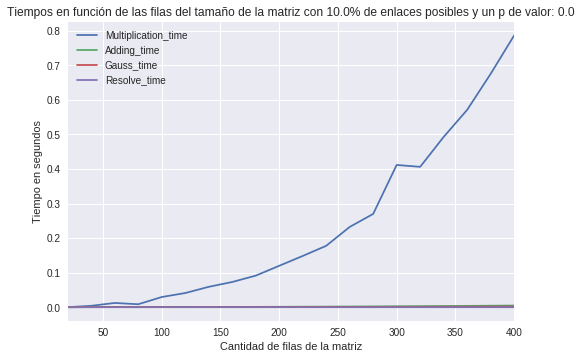

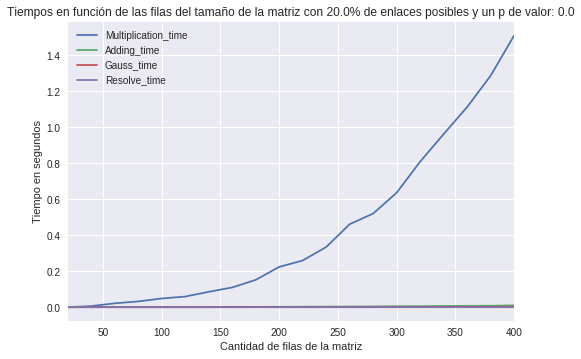

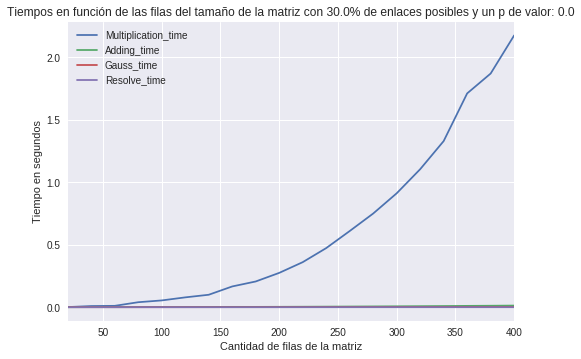

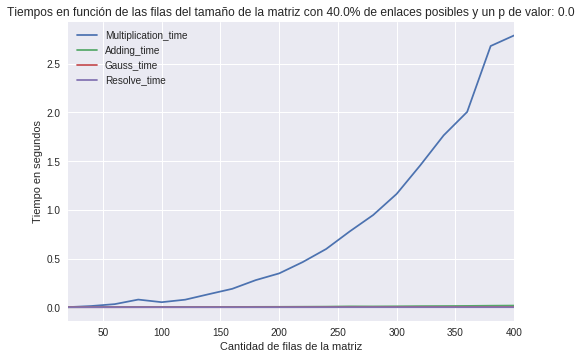

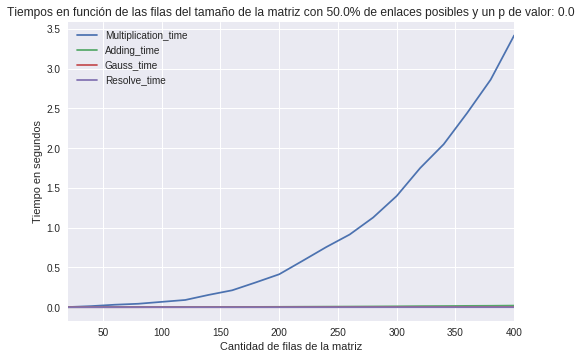

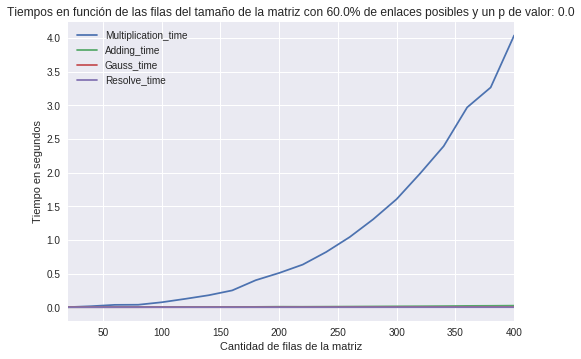

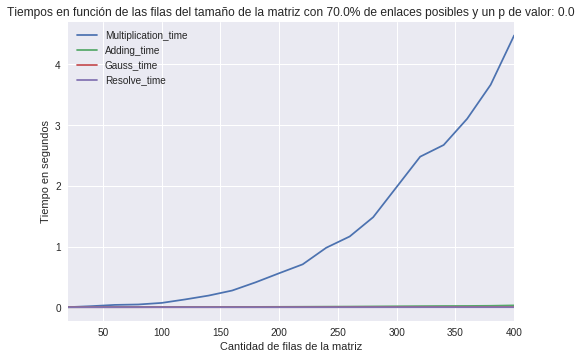

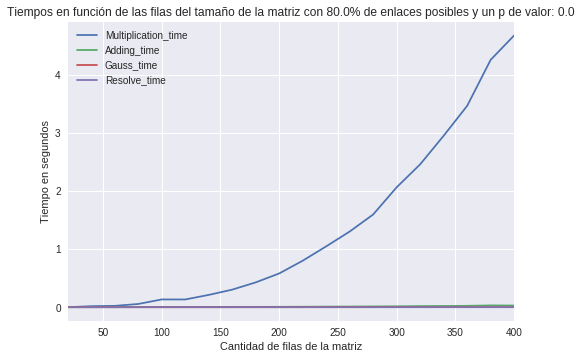

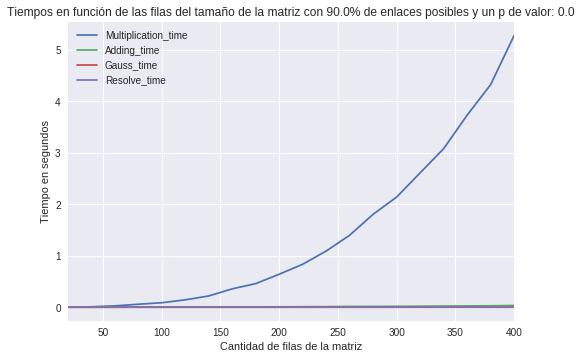

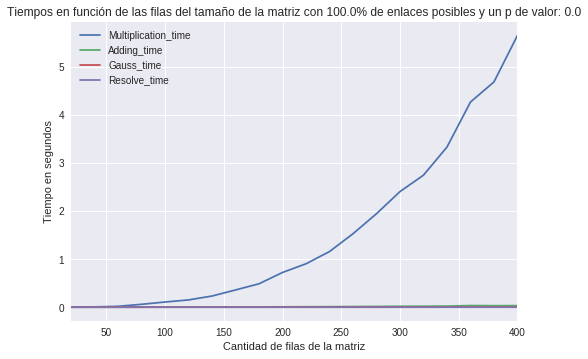

In [157]:
def plotRows(percentageOfNonZeroValues,pValue):

    df = pd.read_csv(results_path+"time", delimiter=";")

    df = df[df.Links == df.Rows ** 2 * percentageOfNonZeroValues]

    df = df.drop('Links',axis=1)
    df = df.drop('P', axis = 1)

    df = df.sort_values("Rows")


    ax = df.plot(x="Rows", logy=False)
    ax.set_ylabel("Tiempo en segundos")
    ax.set_xlabel("Cantidad de filas de la matriz")
    title = "Tiempos en función de las filas del tamaño de la matriz con "+str(percentageOfNonZeroValues*100)+"% de enlaces posibles y un p de valor: " +str(pValue) 
    plt.title(title)
    plt.title(title)
    plt.show()

for i in range(1,11,1):
    plotRows(i/10, pValue)


# Calculemos como afecta a los tiempos variar P

In [168]:
results_path = "./results/"
matrix_size = 160
def refreshTimeResults():
    filename = results_path + "time"
    f = open(filename,"w+")
    f.write("Rows;Links;P;Multiplication_time;Adding_time;Gauss_time;Resolve_time \n")
    f.close()

refreshTimeResults()

for filename in glob.glob(os.path.join(inputs_path, str(matrix_size)+'_1.0.txt')):
    out_path = ntpath.basename(filename)
    param = "../experimentacion/inputs/"+out_path
    for pValue in range(1,101,1):
        pValue = pValue /100        
        !../cmake-build-debug/pageRank $param $pValue

0.349253;0.0158665;0.249967;0.000391077
0.01
0.00624716
0.0062503
0.00625058
0.00624789
0.00624463
0.00625864
0.00625205
0.00624709
0.00625035
0.00624405
0.00625789
0.00625454
0.00625268
0.00624955
0.00625471
0.00624744
0.00625144
0.00625101
0.00624812
0.00625498
0.00624539
0.00624585
0.00625017
0.00625219
0.00625028
0.00625246
0.00625194
0.00624772
0.00624628
0.00624825
0.00625254
0.00624624
0.00625159
0.0062484
0.00625112
0.00625206
0.00625664
0.00625027
0.00624674
0.00624915
0.00625726
0.00624672
0.00625393
0.00625376
0.0062493
0.00625068
0.00624905
0.00625694
0.00625024
0.0062484
0.00624781
0.00625192
0.00624794
0.00625187
0.0062564
0.00625401
0.00625238
0.00624458
0.00624578
0.00624738
0.00625375
0.00624884
0.00625058
0.00624526
0.00624809
0.00624391
0.0062486
0.00625488
0.00624694
0.00625341
0.00624311
0.00624823
0.00625398
0.00625224
0.00625053
0.00625077
0.00624652
0.00625132
0.00625165
0.00624858
0.0062483
0.00624544
0.00625178
0.00625186
0.00624982
0.00625089
0.00624925
0.006

0.347162;0.0159288;0.250143;0.0003962
0.06
0.00623533
0.00625413
0.00625582
0.00623958
0.00621993
0.00630419
0.00626441
0.00623456
0.00625401
0.00621636
0.00629909
0.00627925
0.00626798
0.00624909
0.00628017
0.00623621
0.00626059
0.00625772
0.00624044
0.00628169
0.00622379
0.00622624
0.00625255
0.00626477
0.0062529
0.00626644
0.0062632
0.0062374
0.00622877
0.00624079
0.00626626
0.00622861
0.00626094
0.00624153
0.00625777
0.00626339
0.0062907
0.00625239
0.00623117
0.00624597
0.00629437
0.00623136
0.00627426
0.00627344
0.00624651
0.00625541
0.0062447
0.00629256
0.00625191
0.0062412
0.00623731
0.00626228
0.00623838
0.00626157
0.00628928
0.00627457
0.00626434
0.00621781
0.00622485
0.00623471
0.00627288
0.00624318
0.00625349
0.00622153
0.00623835
0.00621304
0.00624191
0.00627928
0.00623127
0.00627096
0.00620868
0.006239
0.00627342
0.00626356
0.00625299
0.00625447
0.00622858
0.00625799
0.00625984
0.00624133
0.00623929
0.00622216
0.00626104
0.00626078
0.00624872
0.00625433
0.00624479
0.006267

0.394769;0.0158812;0.249876;0.000549257
0.11
0.00622756
0.00626199
0.00626512
0.00623512
0.00619903
0.00635383
0.00628046
0.00622552
0.00626102
0.0061922
0.00634333
0.00630743
0.00628653
0.00625178
0.0063089
0.00622772
0.0062731
0.00626737
0.00623574
0.00631147
0.00620473
0.0062087
0.00625761
0.00628015
0.00625771
0.00628328
0.00627714
0.00622905
0.00621317
0.0062356
0.00628186
0.00621301
0.00627271
0.00623668
0.00626628
0.00627658
0.00632628
0.00625596
0.00621694
0.00624467
0.00633292
0.00621782
0.00629576
0.00629467
0.00624497
0.00626241
0.00624108
0.00632977
0.0062545
0.0062354
0.00622759
0.00627394
0.00623019
0.00627195
0.00632372
0.00629604
0.00627643
0.0061917
0.00620427
0.00622277
0.00629269
0.00623785
0.0062564
0.00619776
0.00622836
0.00618155
0.00623571
0.00630376
0.00621497
0.00628934
0.00617436
0.00622918
0.00629206
0.00627511
0.00625512
0.00625798
0.00620977
0.00626475
0.0062679
0.00623377
0.00622948
0.00619805
0.00627089
0.00626912
0.00624724
0.00625603
0.00623913
0.006282

0.369765;0.0187323;0.253172;0.000408606
0.16
0.0062241
0.00627409
0.00627866
0.00623466
0.00618216
0.00640778
0.00630035
0.00622016
0.00627157
0.00617176
0.00639082
0.00633928
0.00630854
0.00625781
0.00634105
0.00622218
0.00628912
0.00628013
0.0062342
0.0063445
0.00618841
0.00619343
0.00626554
0.00629845
0.0062649
0.00630317
0.00629393
0.00622283
0.00619963
0.00623281
0.0062995
0.0061996
0.00628704
0.00623399
0.00627682
0.00629179
0.00636354
0.00626111
0.0062042
0.00624537
0.00637306
0.00620623
0.0063186
0.0063176
0.00624481
0.00627177
0.00623832
0.00636865
0.00625812
0.00623111
0.00621876
0.00628705
0.00622344
0.00628313
0.00635981
0.00631854
0.00628876
0.00616635
0.00618413
0.00621165
0.00631326
0.00623293
0.0062594
0.00617399
0.0062182
0.00614948
0.00623006
0.00632839
0.00619811
0.00630865
0.00614018
0.0062188
0.00630993
0.00628695
0.00625694
0.00626131
0.00619011
0.00627163
0.00627585
0.00622595
0.00621885
0.00617309
0.00628134
0.00627687
0.0062454
0.00625596
0.00623224
0.00629673


0.34212;0.0159281;0.253195;0.000392068
0.21
0.00622516
0.00629063
0.00629667
0.0062384
0.00616956
0.00646624
0.00632428
0.00621871
0.00628586
0.00615525
0.00644179
0.00637501
0.00633421
0.0062674
0.00637677
0.00621982
0.00630886
0.00629619
0.00623604
0.00638094
0.00617501
0.00618067
0.00627656
0.00631983
0.00627467
0.00632627
0.00631378
0.00621894
0.00618832
0.00623258
0.00631938
0.00618854
0.00630406
0.00623364
0.00628956
0.00630921
0.00640265
0.00626802
0.00619308
0.00624821
0.00641496
0.00619674
0.00634291
0.00634237
0.00624618
0.00628358
0.00623653
0.00640933
0.00626288
0.00622843
0.0062109
0.00630173
0.00621826
0.00629528
0.00639765
0.0063422
0.00630145
0.00614186
0.00616457
0.0062014
0.00633466
0.00622853
0.00626254
0.00615029
0.00620794
0.0061169
0.00622502
0.00635323
0.00618074
0.00632898
0.00610622
0.00620791
0.00632705
0.0062991
0.00625848
0.00626451
0.00616964
0.00627864
0.0062837
0.00621788
0.0062074
0.00614732
0.00629242
0.00628402
0.00624321
0.0062541
0.0062241
0.00631088

0.35724;0.0178309;0.272936;0.00044
0.26
0.00623102
0.00631184
0.00631935
0.00624652
0.00616149
0.00652945
0.00635243
0.00622137
0.00630411
0.00614286
0.00649645
0.00641486
0.00636375
0.00628075
0.00641622
0.00622087
0.00633251
0.00631574
0.00624147
0.00642098
0.00616475
0.00617066
0.00629087
0.00634442
0.00628724
0.00635278
0.00633689
0.00621761
0.00617942
0.00623506
0.00634169
0.00617999
0.00632391
0.0062358
0.00630469
0.006329
0.00644378
0.00627685
0.00618374
0.00625335
0.00645879
0.00618949
0.00636888
0.00636918
0.00624923
0.00629798
0.00623585
0.00645192
0.00626893
0.00622749
0.00620412
0.00631814
0.00621476
0.00630855
0.00643733
0.00636716
0.00631462
0.00611835
0.00614571
0.00619212
0.00635698
0.00622476
0.00626592
0.00612676
0.00619768
0.00608385
0.00622066
0.00637838
0.00616295
0.00635042
0.00607254
0.00619655
0.00634346
0.0063116
0.00625977
0.00626762
0.0061484
0.00628583
0.00629146
0.00620959
0.00619511
0.00612073
0.00630415
0.00629059
0.0062407
0.00625043
0.00621469
0.0063248

0.388176;0.0179189;0.286715;0.000426272
0.31
0.000441537
0.00052475
0.000474363
0.00278938
0.00281998
0.000555825
0.00281185
0.000421178
0.000427392
0.000429882
0.000496662
0.00054404
0.000450041
0.00281839
0.00286266
0.000411679
0.000489899
0.0027912
0.00285761
0.0027974
0.000427007
0.00275812
0.00282331
0.000431702
0.000401195
0.00283979
0.00283367
0.000396029
0.00272915
0.00277669
0.00282667
0.000356267
0.00279091
0.00275168
0.00283657
0.00276924
0.00281517
0.00282652
0.00275818
0.00281152
0.00286726
0.00272446
0.00281265
0.0028883
0.000340995
0.00278587
0.00281876
0.000362287
0.00280988
0.00278153
0.000259908
0.00287024
0.00281961
0.000304
0.00285836
0.00283426
0.000247951
0.00275027
0.0027612
0.00022046
0.00281287
0.00278694
0.00280186
0.00279195
0.00278457
0.000198186
0.00277463
0.00279531
0.00278208
0.00278565
0.00273812
0.000173955
0.00284295
0.0027571
0.00277229
0.000203753
0.00276943
0.000212764
0.00274437
0.00019137
0.00276166
0.00279175
0.00283656
0.0001762
0.00274496
0.002

0.352335;0.0159163;0.292847;0.000460762
0.36
0.00320592
0.00318245
0.000234292
0.00316677
0.00318091
0.00322645
0.00315753
0.00321402
0.00315518
0.000165012
0.00325236
0.000168378
0.00320119
0.00319964
0.00317702
0.00321285
0.00316628
0.000155188
0.00321143
0.00321414
0.000118682
0.000110751
0.00322563
0.00314134
0.00320039
8.41374e-05
0.00318352
9.65946e-05
6.19935e-05
6.93634e-05
5.9046e-05
0.00314017
0.0031838
6.00153e-05
0.00322394
0.00322489
0.00319854
0.00316716
0.00317384
3.5275e-05
0.00326205
2.33022e-05
0.00322663
0.00318229
0.0031783
-4.02601e-19
0.899521
-3.37099e-20
-3.97321e-19
-3.95963e-19
-2.22381e-20
-4.09392e-19
-4.04176e-19
-4.07922e-19
-4.05241e-19
-4.09158e-19
-4.10119e-19
-2.87477e-20
-2.46053e-20
-4.05247e-19
-4.01107e-19
-2.78634e-20
-4.03377e-19
-2.44528e-20
-1.79332e-20
-4.00723e-19
-3.99746e-19
-4.07589e-19
-1.64358e-20
-4.08628e-19
-3.96831e-19
-1.33093e-20
-4.15061e-19
-4.01048e-19
-1.66445e-20
-1.54416e-20
-1.36367e-20
-1.85961e-20
-4.02909e-19
-1.82022e-20

0.403303;0.0161105;0.259017;0.000411774
0.41
0.00628012
0.006406
0.00641787
0.00629925
0.00616743
0.00675008
0.00646437
0.00625657
0.00638495
0.00613274
0.0066853
0.00656153
0.00647809
0.00634583
0.00655873
0.0062472
0.00642907
0.00639754
0.00628176
0.00656472
0.00615516
0.00615987
0.00635609
0.00643917
0.00634418
0.00645489
0.00642802
0.00623135
0.00616903
0.00626056
0.00642559
0.00617138
0.00640206
0.00625927
0.00636673
0.00640483
0.00658144
0.00631698
0.00616823
0.00628418
0.00660387
0.00618293
0.0064587
0.00646369
0.0062703
0.0063578
0.00624195
0.0065925
0.00629629
0.0062365
0.00619158
0.00637951
0.0062157
0.006357
0.00656855
0.00645145
0.00635845
0.00605512
0.00609489
0.00617099
0.00643041
0.00621846
0.0062785
0.00605813
0.006168
0.00598287
0.00621244
0.00645671
0.00610786
0.0064225
0.00597417
0.00616032
0.00638902
0.00635178
0.00626257
0.00627699
0.00608069
0.00630889
0.00631444
0.0061838
0.0061533
0.00603637
0.00634367
0.00630686
0.00623154
0.0062284
0.00617866
0.00636551
0.0060

0.343407;0.0158913;0.252383;0.000399413
0.46
0.00630802
0.00644848
0.00646176
0.00632702
0.00618053
0.00683488
0.0065116
0.00627829
0.00642147
0.00613922
0.00675749
0.00662039
0.00652564
0.00637675
0.00661493
0.00626468
0.0064706
0.00643332
0.0063041
0.00662124
0.0061599
0.00616372
0.00638617
0.00647834
0.00637048
0.00649723
0.00646652
0.00624277
0.00617171
0.00627574
0.00646007
0.00617488
0.00643488
0.00627346
0.0063938
0.00643636
0.00663284
0.00633565
0.00616789
0.00630019
0.0066575
0.00618645
0.00649335
0.00650065
0.00628194
0.00638375
0.00624728
0.00664412
0.00630904
0.00624395
0.00619048
0.0064047
0.00622035
0.00637675
0.00661675
0.00648332
0.00637506
0.00603701
0.00608047
0.00616654
0.00645742
0.00621853
0.00628392
0.00603637
0.00615894
0.00594895
0.00621163
0.00648419
0.00608928
0.00644953
0.00594265
0.00614779
0.00640322
0.00636625
0.00626336
0.00628036
0.00605704
0.00631728
0.00632209
0.00617505
0.00613775
0.00600685
0.00635846
0.00631121
0.00622807
0.00621743
0.00616406
0.006

0.344567;0.0159673;0.286056;0.00045832
0.51
0.00136759
0.00413481
0.00133593
0.00405181
0.00132657
0.00427066
0.0040532
0.00397565
0.0040314
0.00129641
0.00152121
0.00140114
0.00407056
0.00405355
0.00412566
0.00396856
0.00400646
0.004025
0.00403881
0.0042473
0.00394424
0.00118246
0.0040837
0.00402194
0.00397116
0.00412046
0.00406307
0.00105985
0.00400275
0.00107115
0.00417677
0.00106766
0.00404904
0.00108404
0.00397939
0.00113251
0.00416501
0.00114198
0.00390346
0.00396844
0.00114309
0.00390756
0.0040933
0.00404368
0.00393444
0.00397038
0.00406318
0.00117965
0.00398913
0.00109777
0.00396325
0.00402546
0.00401847
0.00421868
0.00412519
0.00405225
0.000921919
0.00384194
0.00398793
0.00395584
0.00401308
0.00396551
0.000901114
0.000740957
0.00390818
0.00382567
0.00399766
0.00417254
0.00394971
0.000886968
0.00382088
0.000683047
0.00408014
0.0039591
0.00399426
0.000752069
0.00380817
0.00399282
0.000726109
0.000724443
0.00070239
0.000672695
0.000781081
0.00397868
0.0039319
0.00382551
0.0007538

0.373351;0.0159871;0.268255;0.000441144
0.56
0.00144893
0.00459166
0.00456599
0.00445665
0.00141282
0.00474743
0.00447175
0.00134089
0.0044672
0.00133388
0.0045935
0.00470875
0.00456122
0.00460159
0.0046575
0.00443474
0.00450145
0.00455189
0.00136161
0.00145426
0.00437404
0.0011285
0.00450477
0.00444238
0.00445012
0.00455482
0.00455796
0.0012082
0.00431847
0.00441421
0.00454951
0.00438127
0.0044226
0.00432544
0.00462203
0.00450073
0.00453704
0.00452472
0.000992372
0.00104424
0.00458373
0.00443568
0.00468307
0.00440573
0.000997057
0.0010762
0.00435132
0.00459791
0.000958911
0.00433439
0.00441303
0.00455658
0.00099533
0.00449877
0.00462045
0.00449684
0.00441982
0.00427612
0.00445248
0.00426609
0.00460614
0.000780951
0.000746347
0.000762401
0.00438876
0.000656062
0.00430032
0.00463391
0.00420858
0.000970236
0.00429344
0.00430531
0.00453834
0.00437697
0.00446472
0.00456314
0.000670269
0.000603393
0.00434387
0.00431837
0.00436632
0.00433014
0.00457572
0.00449752
0.00443754
0.000613428
0.000

0.393294;0.0165685;0.261544;0.000417477
0.61
0.00539178
0.00202751
0.00551382
0.00528066
0.00552052
0.00567039
0.00542105
0.00531688
0.00149555
0.00142793
0.0015971
0.00170499
0.00539499
0.00154607
0.00544089
0.00534995
0.00553778
0.00547143
0.005354
0.00538744
0.00527832
0.00136436
0.00150975
0.00142744
0.00145491
0.00553144
0.00139773
0.00549847
0.00121914
0.00512121
0.00554951
0.00515625
0.00530331
0.00527049
0.0013748
0.00524704
0.00132367
0.00118492
0.00529636
0.00522345
0.0056437
0.00526179
0.00531218
0.0012787
0.00133714
0.00537866
0.00531207
0.0013687
0.00111582
0.00101035
0.0053148
0.00119612
0.00525387
0.00105756
0.00537433
0.00111358
0.000949749
0.00524694
0.000821604
0.000981029
0.00537913
0.0053572
0.00515836
0.00535205
0.00520879
0.000835011
0.00537717
0.00525941
0.00081508
0.00528557
0.000803303
0.00536255
0.00082427
0.00517448
0.000762821
0.000864772
0.005332
0.000879064
0.00523544
0.000638089
0.00522854
0.00526417
0.000924359
0.0007248
0.00535401
0.00530455
0.000828553

0.345939;0.0160034;0.25553;0.00041409
0.66
0.00122017
0.00577257
0.00106127
0.00554053
0.00101442
0.0012623
0.00581574
0.00576522
0.00584172
0.00563843
0.00117866
0.00580434
0.000978391
0.00577721
0.00576409
0.00579243
0.00577734
0.0056473
0.00569727
0.00575208
0.000893427
0.0008733
0.000946169
0.005545
0.00068249
0.00595873
0.000777186
0.000782674
0.00576477
0.000606404
0.00591302
0.000619307
0.000501622
0.00564461
0.0055103
0.00578385
0.00584067
0.00569594
0.00563376
0.00552752
0.000409987
0.00552951
0.000513669
0.00569087
0.00555701
0.00559096
0.000388558
0.00561397
0.00564246
0.000285722
0.00580018
0.00568114
0.00544712
0.00586602
0.00551329
0.00578958
0.000266354
0.00550334
0.00022193
0.0056458
0.000140432
0.00568598
0.000178555
0.00570693
0.0058025
0.00557298
0.0055572
0.733796
-2.14458e-19
-1.4053e-17
-1.38016e-17
-3.33709e-19
-1.41399e-17
-2.16638e-19
-2.16866e-19
-1.35974e-17
-1.35753e-17
-1.39364e-17
-1.54719e-15
-5.8629e-32
-2.05927e-33
-5.52367e-32
-3.02318e-33
-2.02018e-33

0.350277;0.0163416;0.263391;0.000430304
0.71
0.000694192
0.00680248
0.00682142
0.000649222
0.00718707
0.00709411
0.000490596
0.00685792
0.00694175
0.006945
0.00710681
0.00704534
0.0069913
0.00689564
0.0067385
0.000412278
0.00684624
0.00698235
0.00679544
0.00692559
0.0069375
0.0070364
0.00694876
0.000107696
0.0002124
0.00688799
0.000156471
0.00703572
0.00689828
7.04807e-19
7.20969e-19
2.81432e-20
4.89898e-05
0.00691841
0.837588
2.89692e-20
7.58944e-19
7.24195e-19
1.71818e-20
7.10302e-19
1.84158e-20
7.08474e-19
7.42194e-19
7.36884e-19
1.15809e-20
7.15722e-19
2.51849e-34
7.30299e-19
9.15736e-17
2.51983e-34
-1.91114e-32
-2.41203e-30
1.82814e-32
2.49731e-30
-5.46892e-50
-5.64241e-50
-2.19021e-48
-6.99372e-50
-2.177e-48
-3.48029e-80
-2.21251e-48
-2.182e-48
-2.21001e-48
-2.17247e-48
-2.47804e-46
2.81828e-62
-1.01942e-78
-1.058e-78
-1.78745e-80
-1.00723e-78
-1.75053e-80
-1.06244e-78
-1.07494e-78
-1.02448e-78
3.35254e-94
1.2581e-92
3.3895e-94
-1.22302e-76
1.11495e-94
1.21614e-92
1.27736e-92
1.1

0.360891;0.0208513;0.282197;0.000451445
0.76
0.000564159
0.000390047
0.000454493
0.0070822
0.00719864
0.00724245
0.000333731
0.00709954
0.00702401
0.000281229
0.00046716
0.000345115
0.00718887
0.00719519
0.000174199
0.00724234
0.00707595
0.0072451
0.00717956
0.00718372
0.00712217
6.1017e-05
0.00725205
-7.74273e-19
0.00723476
0.889362
-7.90338e-19
-7.93684e-19
-7.85511e-19
-7.21872e-20
-8.06058e-19
-7.85609e-19
-5.6369e-20
-7.49088e-20
-6.88099e-20
-8.0779e-19
-6.33456e-20
-8.11565e-19
-7.76932e-19
-6.74467e-20
-8.20805e-19
-7.77494e-19
-4.97783e-20
-8.1009e-19
-2.19837e-20
-7.71356e-19
-2.82268e-20
-4.20585e-20
-7.99157e-19
-2.64604e-20
-7.86295e-19
-2.89414e-20
-7.6434e-19
-7.91693e-19
-7.58654e-19
-8.09068e-19
-8.09481e-19
-1.31438e-20
-7.73164e-19
-7.37932e-35
-8.02992e-19
-7.98371e-17
-7.58166e-35
-7.42356e-35
-4.36397e-36
-7.40091e-35
-7.41708e-35
-6.69472e-36
-5.02361e-36
-7.70511e-35
-7.56226e-35
-7.67346e-35
-5.40155e-36
-7.5864e-35
-7.63344e-35
-7.41115e-35
-7.6232e-35
-7.5655

0.378606;0.0185325;0.277498;0.000518933
0.81
0.0069875
0.00691116
0.00697723
0.00109348
0.0012306
0.00172264
0.00118911
0.00128113
0.00719295
0.00676962
0.00731386
0.00122691
0.00121554
0.0070386
0.00700568
0.00733294
0.0068775
0.00111763
0.00695117
0.00718394
0.00675873
0.00715814
0.00706337
0.00067895
0.00089252
0.00681186
0.00690231
0.00685199
0.00057634
0.000679735
0.00712517
0.000624418
0.00668187
0.000641802
0.000767117
0.000837682
0.000714809
0.00696559
0.00664729
0.000573255
0.000740677
0.0066756
0.00729531
0.00717677
0.00677139
0.00673117
0.00700212
0.00693793
0.00693947
0.00653102
0.00683338
0.00689932
0.00661084
0.0069911
1.12365e-34
0.00703957
0.006926
0.725326
7.78058e-35
7.23484e-34
-7.91255e-17
7.3411e-34
7.59884e-34
8.69288e-35
7.1872e-35
5.55829e-35
7.21328e-34
7.51337e-34
4.18736e-35
7.31053e-34
6.2486e-35
5.78674e-35
5.28257e-35
7.44738e-34
5.68349e-35
4.16652e-35
7.0677e-34
7.43032e-34
2.53679e-35
7.42814e-34
3.43374e-35
6.88571e-34
5.05061e-35
3.40963e-35
2.43357e-

0.354401;0.0166303;0.294154;0.00054278
0.86
0.00325946
0.00344914
0.00299054
0.00307555
0.00303551
0.00722313
0.00665215
0.00654828
0.00286583
0.0060082
0.00678389
0.00339186
0.00337457
0.00647756
0.00695408
0.00635385
0.00304157
0.00671629
0.00663246
0.00666926
0.00237533
0.00271562
0.00692784
0.00628443
0.00294392
0.00671753
0.00656328
0.00637539
0.00623603
0.00615934
0.00678503
0.00612111
0.00648922
0.00238414
0.00682358
0.0063222
0.00652501
0.00652139
0.00203686
0.00241862
0.00669138
0.00591628
0.00649548
0.00245651
0.00183938
0.00615647
0.00642607
0.00654033
0.00638021
0.00617934
0.00611478
0.00243378
0.00600514
0.00609161
0.00250326
0.0067281
0.00637194
0.0055845
0.00189641
0.00561781
0.00198781
0.00623924
0.00619113
0.00183917
0.00198826
0.00576758
0.00624311
0.00622496
0.00148883
0.00217156
0.00177129
0.00176947
0.00623175
0.0057895
0.00600491
0.00176041
0.00602145
0.00636309
0.0059012
0.00642505
0.00611966
0.00623474
0.00168452
0.00598508
0.00642959
0.00143806
0.0060046
0.0014

0.344771;0.0159568;0.251328;0.000396131
0.91
0.00711175
0.00727664
0.00730192
0.00655218
0.00694316
0.00370463
0.00700256
0.00691885
0.00706774
0.00279913
0.00369792
0.00711122
0.00305954
0.00673158
0.00715934
0.00692421
0.00715837
0.00676892
0.00681575
0.00706505
0.00648802
0.00698429
0.00280362
0.00675126
0.00707104
0.00294672
0.0029116
0.00693185
0.00207077
0.00237398
0.00708552
0.00652954
0.0026035
0.00660924
0.00700057
0.00668106
0.00717354
0.00235381
0.00643883
0.00660298
0.00727097
0.00649608
0.00261981
0.00724602
0.00675634
0.00650357
0.00663451
0.00680747
0.00204772
0.00655259
0.00174659
0.00705473
0.00678482
0.00204629
0.00658763
0.00689132
0.00665651
0.00661608
0.0014877
0.00654536
0.00665023
0.00175198
0.00663073
0.0017184
0.00648808
0.00633347
0.00150061
0.00165418
0.0064669
0.00667673
0.00636165
0.00660624
0.00140338
0.00661675
0.0010557
0.00120137
0.00620149
0.00673317
0.00650408
0.00131846
0.000912237
0.0012061
0.00690328
0.00677805
0.000969891
0.00684136
0.000998699
0.

0.342514;0.0159581;0.253868;0.000417263
0.96
0.00751614
0.00292214
0.00341839
0.00714115
0.00766713
0.00356187
0.00310449
0.00765652
0.00281674
0.00743994
0.0080543
0.00819983
0.00767807
0.00294152
0.00763445
0.0074084
0.00265122
0.00766551
0.00283046
0.00744431
0.00229534
0.00751085
0.00761093
0.00763505
0.00777307
0.00270956
0.0078611
0.00757607
0.00706011
0.00749525
0.007525
0.00729964
0.00741358
0.00718199
0.0078271
0.00216814
0.00765899
0.00742691
0.00725399
0.00728503
0.00188234
0.00218114
0.00239562
0.00752965
0.001795
0.00725394
0.00173928
0.00188349
0.00726032
0.00156128
0.00137206
0.00785683
0.0018122
0.00204958
0.00756307
0.00800911
0.00753693
0.00160494
0.00739252
0.00682193
0.00741199
0.00726167
0.00749684
0.0014294
0.00732733
0.000935876
0.0012755
0.00742388
0.00716792
0.00752715
0.00101007
0.00710285
0.00782249
0.00701103
0.00761378
0.00740905
0.00717725
0.00730134
0.00738844
0.00687637
0.00699847
0.00698261
0.00736607
0.000526641
0.000388324
0.00761198
0.00732281
0.0074

# Graficamos

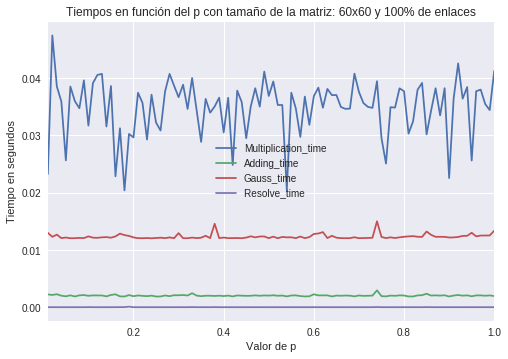

In [167]:
def plotRows(matrix_size):

    df = pd.read_csv(results_path+"time", delimiter=";")

    df = df.drop('Links',axis=1)
    df = df.drop('Rows', axis = 1)

    df = df.sort_values("P")


    ax = df.plot(x="P", logy=False)
    ax.set_ylabel("Tiempo en segundos")
    ax.set_xlabel("Valor de p")
    title = "Tiempos en función del p con tamaño de la matriz: "+str(matrix_size) + "x"+str(matrix_size)+ " y 100% de enlaces" 
    plt.title(title)
    plt.show()

plotRows(matrix_size)
